# **Data Engineering: Missing Values**

Missing data are represented in many ways: blank, 0, ?, NA, NaN, etc. Causes include:

* Data entry lapses or errors
* Data collection problems 
    - unrecorded observations
    - incomplete forms
    - optional form fields without defaults
* Data corruption

Missing values can compromise statistical description and cause machine learning algorithms to fail. It's important to:

1. Find, mark, and visualize missing values in a dataset.
2. Remove rows with missing values as appropriate.
3. Impute or replace missing values as appropriate.

In [ ]:
#All datasets are shared by Mr. Briit at: https://drive.google.com/drive/folders/1kWbENU_vqpGo9cpGEg56uvjtHLSEd5LL
#Add a shortcut to your drive. Then mount your drive to Colab per below. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#You can increase readability by suppressing unnecessary messages.
import warnings
warnings.filterwarnings("ignore")

## Import Libraries and Load the Dataset

In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# load the dataset
data = pd.read_csv('drive/MyDrive/datasets/pima_diabetes_dataset.csv', header=None)

In [ ]:
data.head(15)
#Missing values are recorded as **NaN**.

,0,1,2,3,4,5,6,7,8,9
0,NaN,0,1,2,3,4,5.0,6.000,7,8
1,0.0,6,148,72,35,0,33.6,0.627,50,1
2,1.0,1,85,66,29,0,26.6,0.351,31,0
3,2.0,8,183,64,0,0,23.3,0.672,32,1
4,3.0,1,89,66,23,94,28.1,0.167,21,0
5,4.0,0,137,40,35,168,43.1,2.288,33,1
6,5.0,5,116,74,0,0,25.6,0.201,30,0
7,6.0,3,78,50,32,88,31.0,0.248,26,1
8,7.0,10,115,0,0,0,35.3,0.134,29,0
9,8.0,2,197,70,45,543,30.5,0.158,53,1


In [ ]:
data.isnull().sum()
#Results are the sum for each column.
#Notice that there is 1 missing value; 0,1 is NaN.
#Notice that zeroes are prevalent. 
# Are they valid?
# Are they also missing values? 

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
#Count zeroes in columns 1-5:
#Notice that you can select columns by indexing a list of column names.
zeroes = (data[[1,2,3,4,5]]==0).sum()
zeroes

1    112
2      5
3     35
4    227
5    374
dtype: int64

In [ ]:
#Count missing values for each column.
missing_numbers = (data[[1,2,3,4,5]] == 0).sum()
print(missing_numbers)

1    112
2      5
3     35
4    227
5    374
dtype: int64


In [ ]:
# Numpy provides np.nan which is used to mark missing values. Used in sci-kit learn.
# dataset columns 1-5 redefined as same except 0 is replaced with np.nan
data[[1,2,3,4,5]] = data[[1,2,3,4,5]].replace(0,np.nan)

In Python, specifically Pandas, NumPy and Scikit-Learn, missing values should be marked **NaN**.

Use the **replace()** function to mark values as **NaN**

In [ ]:
data.head(15)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.000,7,8
1,0.0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,1.0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
3,2.0,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
4,3.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,4.0,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,5.0,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,6.0,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,7.0,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8.0,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1


In [ ]:
# Count NaN values in each column
#data.isnull().sum()

### **Visualise the Missing Data**
The MissingNo (Missing Number) package shows the location of missing values.

In [ ]:
#!pip install missingno

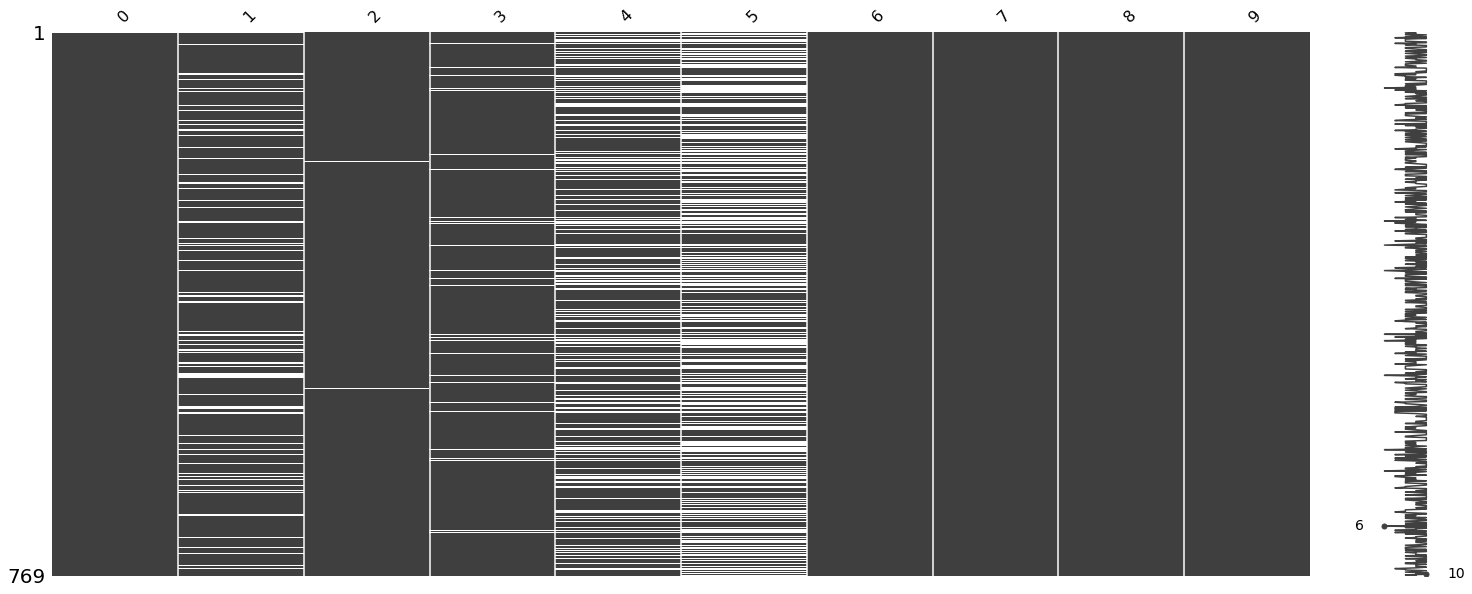

In [ ]:
import missingno as msno 
msno.matrix(data)

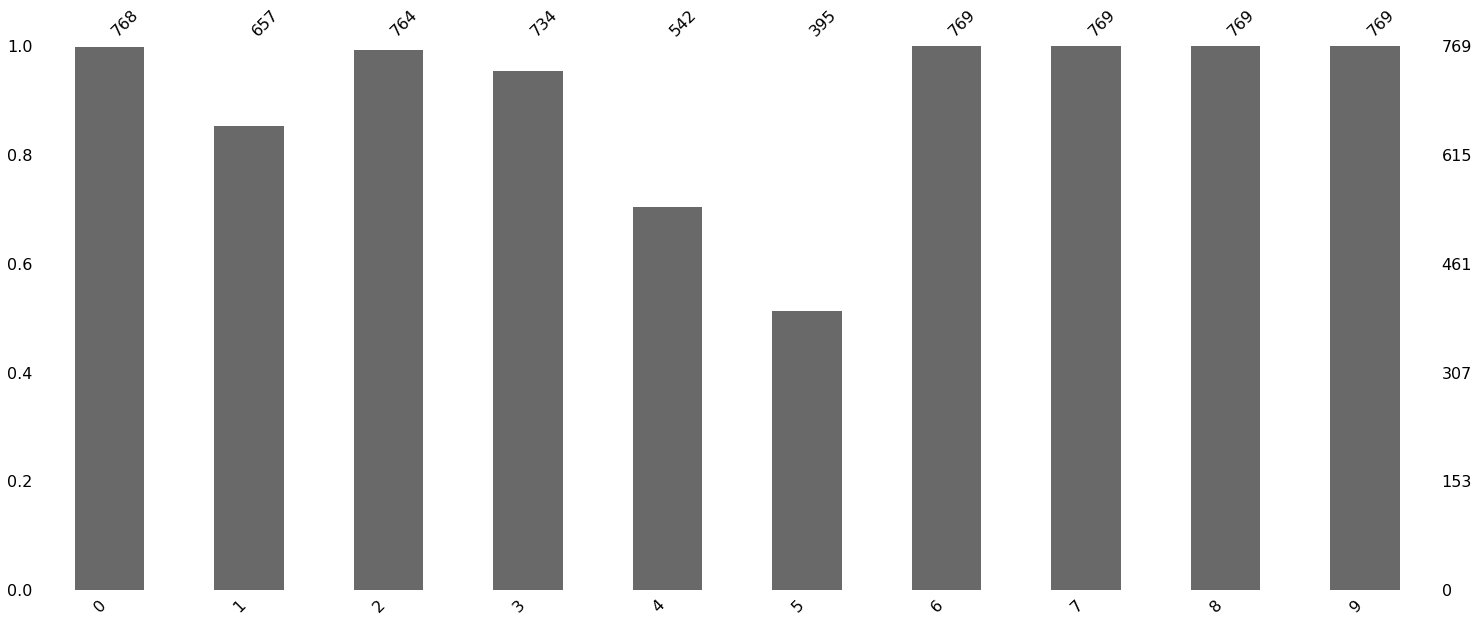

In [ ]:
msno.bar(data)

## Why do we need to deal with Missing Values?

Although some algorithms work with datasets containing missing values, such as decision trees, others do not.

We will prove this using the **Linear Discriminant Analysis (LDA)** algorithm on the dataset with missing values.



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

values = data.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: nan


<br>

As we can see from above, the **Linear Discriminant Analysis (LDA)** algorithm does not work on the dataset with missing values. It points to the fact that there are NaN or missing values present

# **Dealing With Missing Values**

## 1. Dropping the Rows or Columns with Missing Values

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:

In [ ]:
print('Shape of dataset Before droping NaN:',data.shape)

data.dropna(inplace=True)

print('Shape of dataset After droping NaN:',data.shape)

Shape of dataset Before droping NaN: (769, 10)
Shape of dataset After droping NaN: (336, 10)


Now let's try our new dataset with no Missing values on **Linear Discriminant Analysis (LDA)** algorithm 

In [ ]:
values = data.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=50)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.2f' % np.mean(result))

Accuracy: 0.09


Accuracy : 0.78

## **Impute Missing Values**

We can impute Missing Values using several strategies. Below are common methods:

1. A meaningful constant value in the domain, such as 0 which is distinct from all other values.
2. A mean, median, or mode for the column.
3. A value from another randomly selected record.
4. A value estimated by another predictive model.

### Filling the Missing Values with a Central Tendency (Mean, Median, Mode)

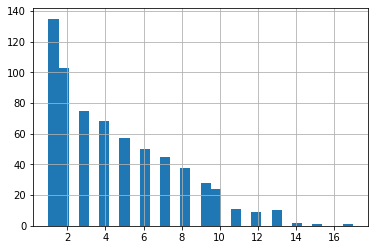

In [ ]:
data[1].hist(bins=30)

Skewed, so use mode to impute.

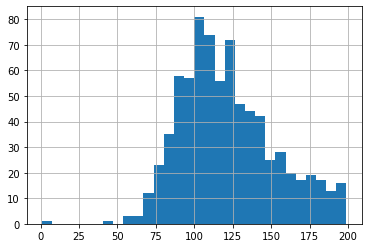

In [ ]:
data[2].hist(bins=30)

Close call for me, but skewed, so use mode to impute.

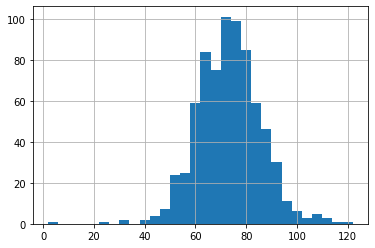

In [ ]:
data[3].hist(bins=30)

Fairly uniform, use mean to impute.

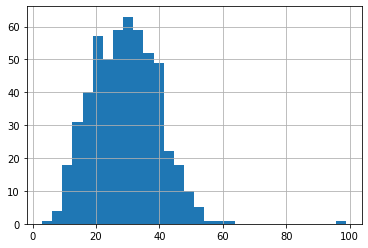

In [ ]:
#@title
data[4].hist(bins=30)

Fairly uniform, use mean to impute.

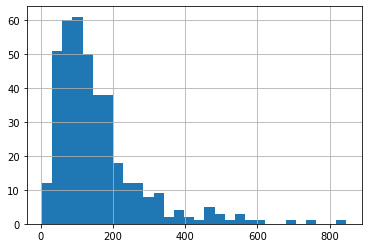

In [ ]:
#@title
data[5].hist(bins=30)

Skewed, use mode to impute

In order to deal with the missing values appropriately, it's important to know the distribution of the column as well as the skewness.

Let's see below how outliers and skewness are important in dealing with missing values.

In [ ]:
#In this example, data is uniformly distributed. i.e. mean=median=mode
a=[25, 27, 27, 29,26] #normaly distributed

In [ ]:
print(np.mean(a))
import statistics as stats
print(stats.mode(a))
print(stats.median(a))

26.8
27
27


In [ ]:
#@title
#data is skewed and not uniformly distributed. i.e mean> both mode and median
a=[25, 27, 27, 29,95] #skewed

In [ ]:
#@title
print(np.mean(a))
import statistics
print(statistics.mode(a))
print(statistics.median(a))

40.6
27
27


Determine which method for imputation:
- Uniformly distributed (Gaussian) -> mean
- Skewed (not uniform) -> mode




In [ ]:
data.shape

(336, 10)

**column 1**

In [ ]:
c1 = data[1].mode()

In [ ]:
# After you determine the best method, use: 
#df['column'].fillna(df['column'].method, inplace=True)
data[1].fillna(c1, inplace=True)
# count the number of NaN values in each column
print(data[1].isnull().sum())
print(data[1].head())

111
0    1.0
1    6.0
2    1.0
3    8.0
4    1.0
Name: 1, dtype: float64


**Column 2**

In [ ]:
#@title
# fill missing values with mean column values
data[2].fillna(data[2].mode(), inplace=True)
# count the number of NaN values in each column
print(data[2].isnull().sum())

5


**Column 3**

In [ ]:
#@title
# fill missing values with mean column values
data[3].fillna(data[3].mean(), inplace=True)
# count the number of NaN values in each column
print(data[3].isnull().sum())

0


**Column 4**

In [ ]:
#@title
# fill missing values with mean column values
data[4].fillna(data[4].mean(), inplace=True)
# count the number of NaN values in each column
print(data[4].isnull().sum())

0


**Column 5**

In [ ]:
c5 = data[5].mode()
c5

0    105.0
dtype: float64

In [ ]:
#@title
# fill missing values with mean column values
data[5].fillna(c5, inplace=True)
# count the number of NaN values in each column
print(data[5].isnull().sum())

374


In [ ]:
data[5].head()

0     4.0
1     NaN
2     NaN
3     NaN
4    94.0
Name: 5, dtype: float64

In [ ]:
data.isnull().sum()

0      1
1    111
2      5
3      0
4      0
5    374
6      0
7      0
8      0
9      0
dtype: int64

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,1.0,1.0,2.0,3.000000,4.0,5.0,6.000,7,8
1,0.0,6.0,148.0,72.0,35.000000,NaN,33.6,0.627,50,1
2,1.0,1.0,85.0,66.0,29.000000,NaN,26.6,0.351,31,0
3,2.0,8.0,183.0,64.0,29.105166,NaN,23.3,0.672,32,1
4,3.0,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21,0


## Using Scikit-learn's SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
imputed_data = imputer.fit_transform(data)
# count the number of NaN values in each column
print('Missing: %d' % np.isnan(imputed_data).sum())

Missing: 0


In [ ]:
df = pd.DataFrame(imputed_data)
df.head(15)

,0,1,2,3,4,5,6,7,8,9
0,383.5,1.000000,1.0,2.000000,3.000000,4.000000,5.0,6.000,7.0,8.0
1,0.0,6.000000,148.0,72.000000,35.000000,155.164557,33.6,0.627,50.0,1.0
2,1.0,1.000000,85.0,66.000000,29.000000,155.164557,26.6,0.351,31.0,0.0
3,2.0,8.000000,183.0,64.000000,29.105166,155.164557,23.3,0.672,32.0,1.0
4,3.0,1.000000,89.0,66.000000,23.000000,94.000000,28.1,0.167,21.0,0.0
5,4.0,4.489362,137.0,40.000000,35.000000,168.000000,43.1,2.288,33.0,1.0
6,5.0,5.000000,116.0,74.000000,29.105166,155.164557,25.6,0.201,30.0,0.0
7,6.0,3.000000,78.0,50.000000,32.000000,88.000000,31.0,0.248,26.0,1.0
8,7.0,10.000000,115.0,72.309264,29.105166,155.164557,35.3,0.134,29.0,0.0
9,8.0,2.000000,197.0,70.000000,45.000000,543.000000,30.5,0.158,53.0,1.0


In [ ]:
#Notice that you can separate the header row from all values.
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
data[9].values

array([8, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

##Pipeline with Model
Create a pipeline that preps the dataset, then trains and evaluates a **Linear Discriminant Analysis (LDA)** algorithm. 


In [ ]:
from sklearn.pipeline import Pipeline

#1 READ DATA
df = pd.read_csv('drive/MyDrive/datasets/pima_diabetes_dataset.csv', header=None)

#2 REPLACE 0s with NaN in every column
df = df.replace(0,np.nan)

#4a SPLIT dataset into values/labels (remove labels) 
values = df.values

#4b DEFINE predictors/target aka inputs/output
x = values[:,0:8]
y = values[:,8]

#5 INSTANTIATE the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#6 INSTANTIATE the MODEL
lda = LinearDiscriminantAnalysis()

#7 DEFINE the PIPELINE
#Note steps are normally impute, other data preparataions, then model.
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])

#8 DEFINE the cross validation procedure
#Note that splits and shuffling are best practice. 
#Set the seed for reproducibility 
kfold = KFold(n_splits=4, shuffle=True, random_state=50)

#9 EVALUATE the model
result = cross_val_score(pipeline, x, y, cv=kfold, scoring='accuracy')

#10 REPORT the mean performance
print('Accuracy: %.2f' % result.mean())


Accuracy: 0.08


Accuracy : 0.82